<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-02-03-Ensemble/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://1drv.ms/u/s!AmSu_rSXl5m3iSQr2MckZa36MYSJ?e=jV7Y61)

# Voting Classifier

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X, Y = make_moons(n_samples = 500, shuffle = True, noise = 0.1)
X.shape, Y.shape

((500, 2), (500,))

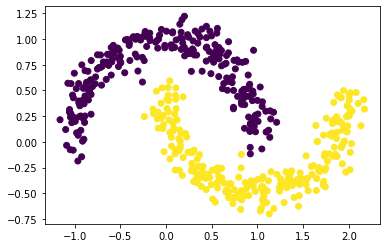

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC(probability=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [
              ('logistic', log),
              ('knn', knn),
              ('tree', tree),
              ('nb', nb),
              # ('svc', svc)
]

vclf = VotingClassifier(estimators = estimators, voting = 'soft')

bahuballi ->>  99%

mera nam surya  67%

mera nam surya  57%

In [ ]:
from sklearn.metrics import accuracy_score

est = [log, knn, tree, nb, svc, vclf]

for model in est:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(model.__class__.__name__ ,accuracy_score(y_pred, ytest))

LogisticRegression 0.848
KNeighborsClassifier 1.0
DecisionTreeClassifier 0.968
GaussianNB 0.848
SVC 0.992
VotingClassifier 0.976


# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tclf = DecisionTreeClassifier()
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100)

In [ ]:
from sklearn.metrics import accuracy_score

est = [tclf, bclf]

for model in est:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(model.__class__.__name__ ,accuracy_score(y_pred, ytest))

DecisionTreeClassifier 0.968
BaggingClassifier 0.976


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


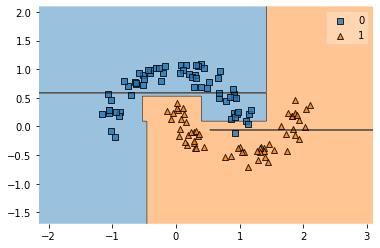

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(xtest, ytest, clf = tclf)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


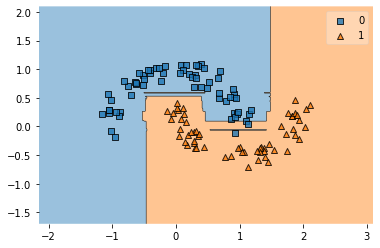

In [ ]:
plot_decision_regions(xtest, ytest, clf = bclf)

# Pasting

In [ ]:
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, bootstrap=False)
bclf.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=100)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


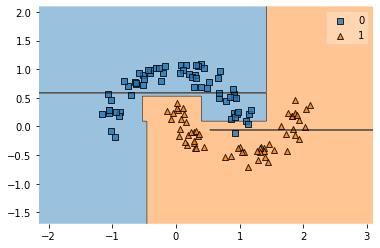

In [ ]:
plot_decision_regions(xtest, ytest, clf = bclf)

In [ ]:
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score=True)
bclf.fit(X, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True)

In [ ]:
bclf.oob_score_

0.986

# Warm Start

In [ ]:
! pip install tqdm 

In [ ]:
bclf = BaggingClassifier(DecisionTreeClassifier(), warm_start = True)

In [ ]:
from tqdm.notebook import tqdm, trange

tests = []
trains = []

bclf.n_estimators = 0
for i in tqdm(range(10)):
    bclf.n_estimators = bclf.n_estimators + 1
    bclf.fit(xtrain, ytrain)
    
    testscore = bclf.score(xtest, ytest)
    trainscore = bclf.score(xtrain, ytrain)
    tests.append(testscore)
    trains.append(trainscore)

  0%|          | 0/10 [00:00<?, ?it/s]

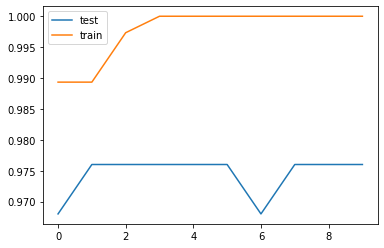

In [ ]:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')

plt.legend()

**Best result is at index 2 estimators**

In [ ]:
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=4)
model.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=4)

In [ ]:
model.score(xtest, ytest), model.score(xtrain, ytrain)

(0.984, 1.0)

# Random Forest

row sampling + col sampling

variance reduces even more than Bagging

Bias increases slightly

In [ ]:
xtrain.shape

(375, 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features = True, max_features=0.5, n_jobs=-1)

In [ ]:
bag.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_features=0.5, n_jobs=-1)

In [ ]:
from sklearn import tree

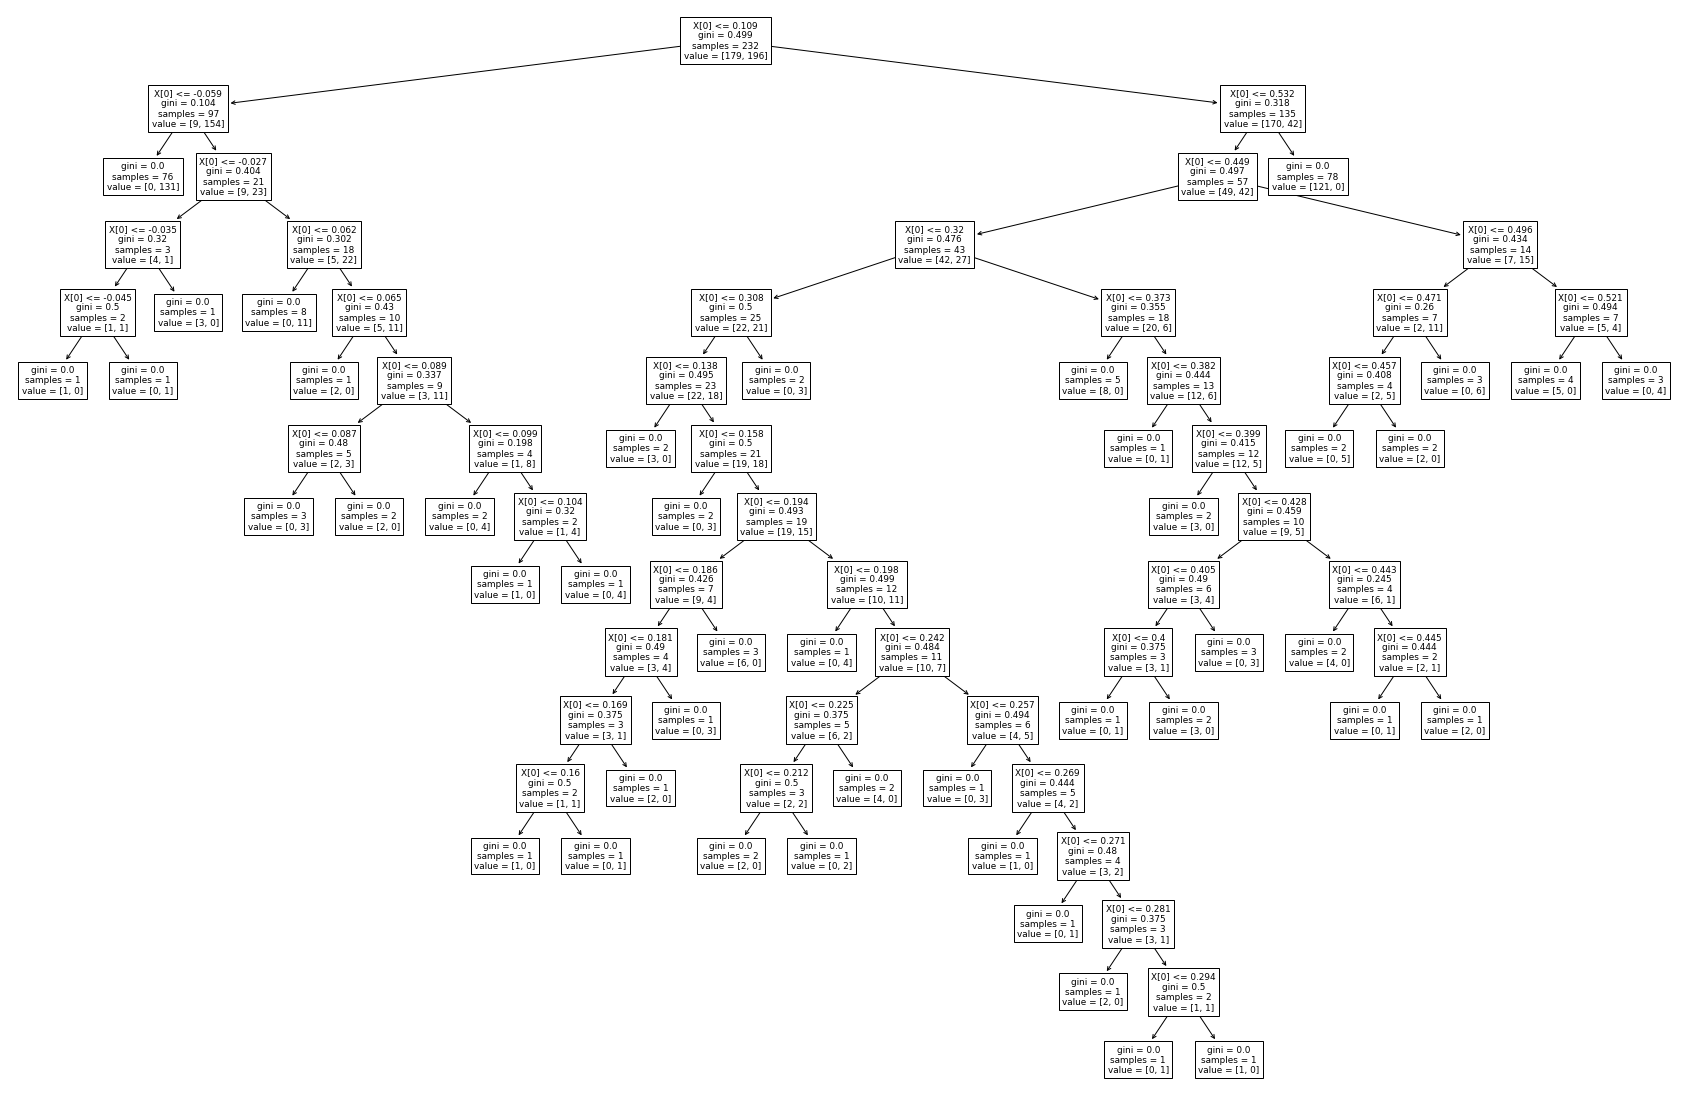

In [ ]:
plt.figure(figsize = (30, 20))

tree.plot_tree(bag.estimators_[1])
plt.show()

## Extra Tree

random selection of tau

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier()

In [ ]:
tree.fit(xtrain, ytrain)
tree.score(xtest, ytest)

0.992

In [ ]:
bag.fit(xtrain, ytrain)
bag.score(xtest, ytest)

0.792

In [ ]:
print('bag', bag.score(xtrain, ytrain))
print('extra', tree.score(xtrain, ytrain))

bag 0.992
extra 1.0


# Boosting

## AdaBoost

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

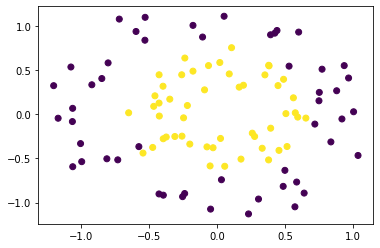

In [ ]:
X, y = make_circles(n_samples = 100, noise = 0.15, factor = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

res = cross_val_score(clf, X, y, cv=5)
print(res)
print(res.mean())

[1.   0.9  0.85 0.95 1.  ]
0.9400000000000001


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1.0, n_estimators= 75)

In [ ]:
from sklearn.model_selection import cross_val_score

res = cross_val_score(clf, X, y, cv=5)
print(res)
print(res.mean())

[1.   0.9  0.85 1.   1.  ]
0.95


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [5, 10, 25, 50, 100],
    'learning_rate': [1.0, 0.01, 0.001, 0.0001],
    'algorithm': ['SAMME.R', 'SAMME']
}

gs = GridSearchCV(clf, param)
gs.fit(X, y)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME', n_estimators=75),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [1.0, 0.01, 0.001, 0.0001],
                         'n_estimators': [5, 10, 25, 50, 100]})

In [ ]:
gs.best_score_, gs.best_params_

(0.95, {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50})

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [40, 50, 75],
    'learning_rate': [1.0, 0.01, 0.02, 0.03],
    'algorithm': ['SAMME.R', 'SAMME']
}

gs = GridSearchCV(clf, param)
gs.fit(X, y)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME', n_estimators=75),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [1.0, 0.01, 0.02, 0.03],
                         'n_estimators': [40, 50, 75]})

In [ ]:
gs.best_score_, gs.best_params_

(0.95, {'algorithm': 'SAMME.R', 'learning_rate': 0.02, 'n_estimators': 75})

In [ ]:
clf.n_estimators

75

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


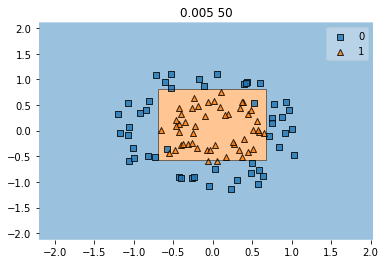

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


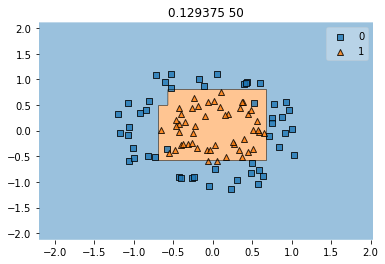

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


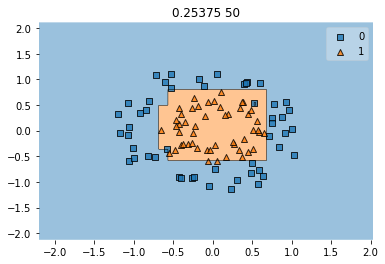

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


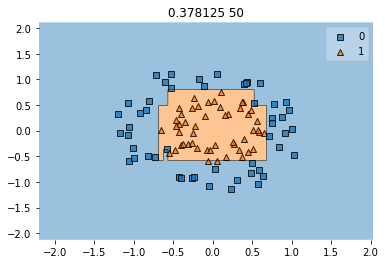

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


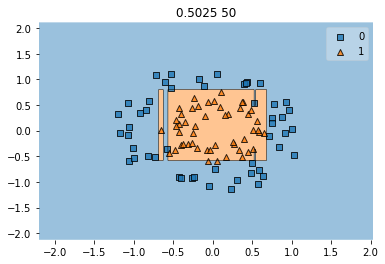

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


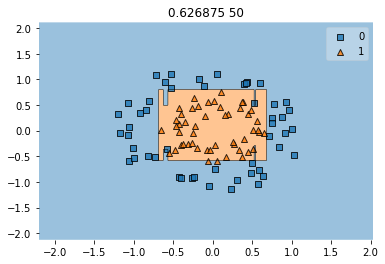

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


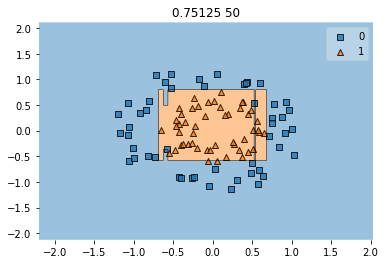

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


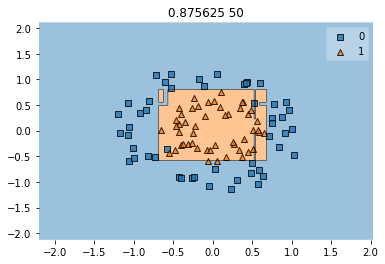

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


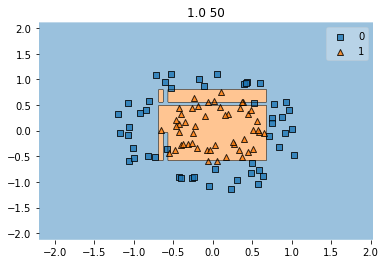

In [ ]:
from mlxtend.plotting import plot_decision_regions

# plt.subplot(3, 3, 1)
# plt.figure(figsize = (10, 25))
for i, lr in enumerate(np.linspace(0.005, 1, 9)):
    # plt.subplot(3, 3, i+1)
    clf = AdaBoostClassifier(learning_rate = lr)
    clf.fit(X, y)
    plot_decision_regions(X, y, clf = clf)
    plt.title('{} {}'.format(lr, clf.n_estimators))
    plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


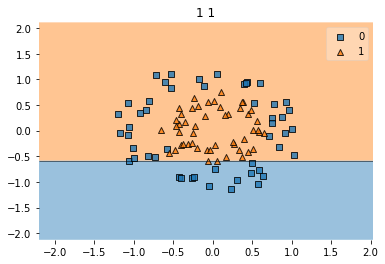

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


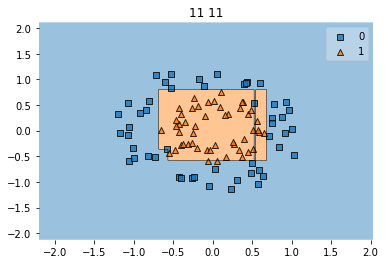

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


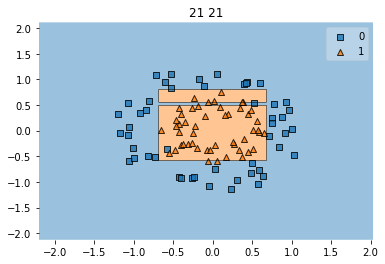

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


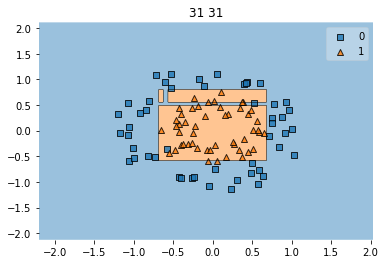

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


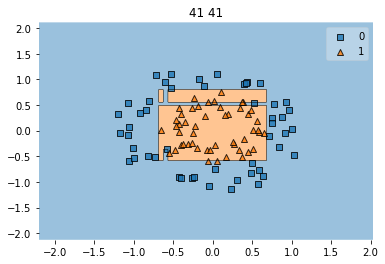

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


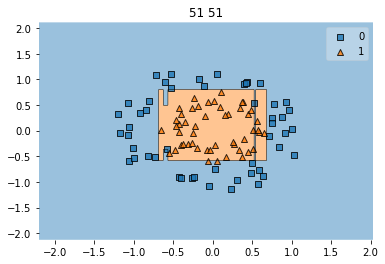

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


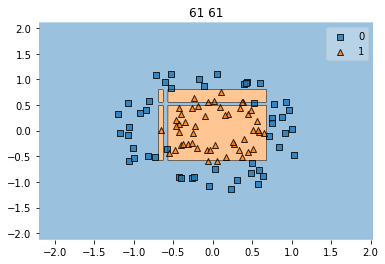

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


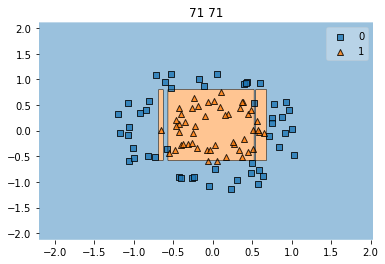

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


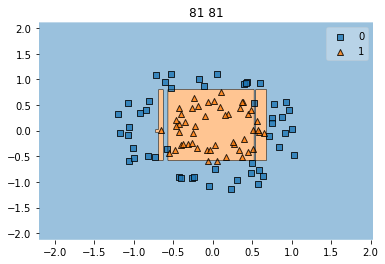

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


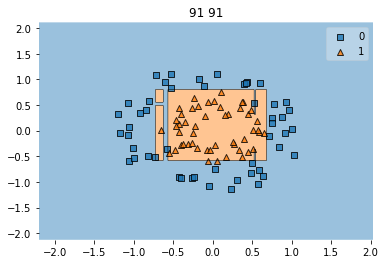

In [ ]:
from mlxtend.plotting import plot_decision_regions

# plt.subplot(3, 3, 1)
# plt.figure(figsize = (10, 25))
for i, lr in enumerate(range(1, 100, 10)):
    # plt.subplot(3, 3, i+1)
    clf = AdaBoostClassifier(n_estimators = lr)
    clf.fit(X, y)
    plot_decision_regions(X, y, clf = clf)
    plt.title('{} {}'.format(lr, clf.n_estimators))
    plt.show()

## Gradient Boosting

In [ ]:
from sklearn.datasets import make_friedman1

X, y = make_friedman1(n_samples = 1000)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

  0%|          | 0/2000 [00:00<?, ?it/s]

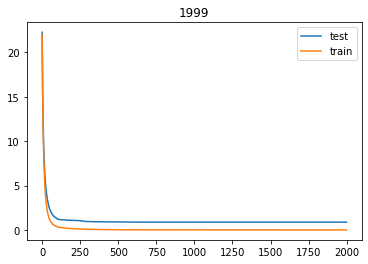

In [ ]:
from tqdm.notebook import tqdm, trange
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(warm_start = True)
tests = []
trains = []

gbr.n_estimators = 0
for i in tqdm(range(2000)):
    gbr.n_estimators = gbr.n_estimators + 1
    gbr.fit(xtrain, ytrain)
    
    testscore = mean_squared_error(gbr.predict(xtest), ytest)
    trainscore = mean_squared_error(gbr.predict(xtrain), ytrain)
    tests.append(testscore)
    trains.append(trainscore)

    # if i % 100 == 0:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')
plt.legend()
plt.title(i)
plt.show()

  0%|          | 0/2000 [00:00<?, ?it/s]

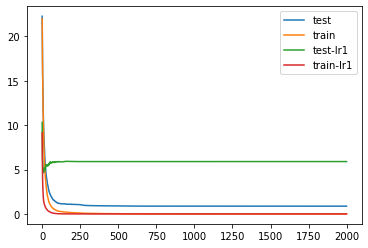

In [ ]:
from tqdm.notebook import tqdm, trange
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(warm_start = True, learning_rate=1.0)

testslr1 = []
trainslr1 = []

gbr.n_estimators = 0
for i in tqdm(range(2000)):
    gbr.n_estimators = gbr.n_estimators + 1
    gbr.fit(xtrain, ytrain)
    
    testscore = mean_squared_error(gbr.predict(xtest), ytest)
    trainscore = mean_squared_error(gbr.predict(xtrain), ytrain)
    testslr1.append(testscore)
    trainslr1.append(trainscore)

    # if i % 100 == 0:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')
plt.plot(testslr1, label = 'test-lr1')
plt.plot(trainslr1, label = 'train-lr1')
plt.legend()
plt.show()

# Stacking

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
X, y = load_diabetes(return_X_y = True)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
estimators = [
              ('linear', LinearRegression()),
              ('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR()),
              ('neighbour', KNeighborsRegressor())
]

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

clf = StackingRegressor(
    estimators = estimators,
    final_estimator = LinearRegression(),
    passthrough = True
)

In [ ]:
models = [m[1] for m in estimators]
models.append(clf)

for model in models:
    model.fit(xtrain, ytrain)
    print(model.__class__.__name__, model.score(xtest, ytest))

LinearRegression 0.5234366928180765
Ridge 0.4390493172091663
Lasso 0.3414370484992847
SVR 0.1477717638066105
KNeighborsRegressor 0.46850960886984894
StackingRegressor 0.5405208073218002


# Bias Variance

[sklearn Bias Variance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
n_repeat = 50  # Number of datasets
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_trains = []
y_trains = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_trains.append(X)
    y_trains.append(y)

X_trains = np.array(X_trains)
y_trains = np.array(y_trains)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

In [6]:
len(X_trains), len(y_trains)

(50, 50)

In [8]:
X_trains[0].shape, y_trains[0].shape

((50, 1), (50,))

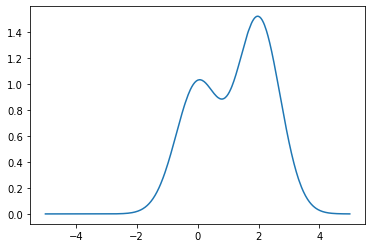

In [9]:
plt.plot(X_test, f(X_test))
plt.show()

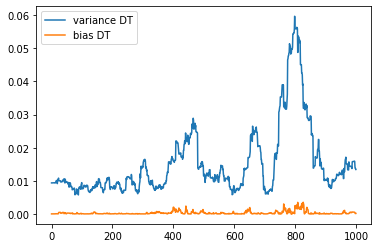

In [10]:
from sklearn.tree import DecisionTreeRegressor
MB = DecisionTreeRegressor()

y_pred = np.zeros( (n_test, n_repeat) )

for i in range(n_repeat):
    MB.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = MB.predict(X_test)

varianceDT = np.var(y_pred, axis = 1)# axis = 1, row
biasDT = (f(X_test) - np.mean(y_pred, axis = 1))**2

plt.plot(varianceDT, label = 'variance DT')
plt.plot(biasDT, label = 'bias DT')
plt.legend()
plt.show()

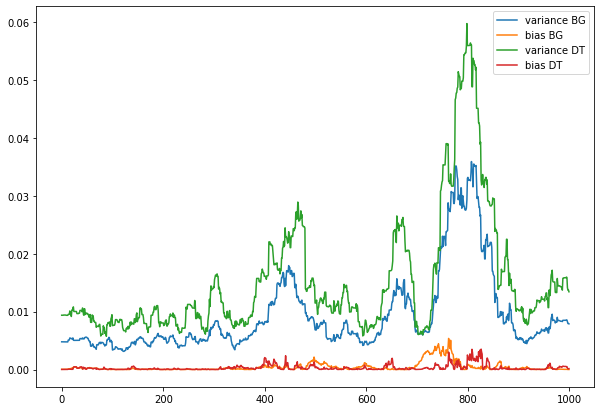

In [14]:
from sklearn.ensemble import BaggingRegressor

MB = BaggingRegressor(DecisionTreeRegressor())

y_pred = np.zeros( (n_test, n_repeat) )

for i in range(n_repeat):
    MB.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = MB.predict(X_test)

varianceBG = np.var(y_pred, axis = 1)# axis = 1, row
biasBG = (f(X_test) - np.mean(y_pred, axis = 1))**2

plt.figure(figsize = (10, 7))
plt.plot(varianceBG, label = 'variance BG')
plt.plot(biasBG, label = 'bias BG')
plt.plot(varianceDT, label = 'variance DT')
plt.plot(biasDT, label = 'bias DT')

plt.legend()
plt.show()